### Variational Quantum Classifier


In this notebook, we are going to train Aqua's Variational Quantum Classifier to classify instances of Breast Cancer dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import Aer
from qiskit.ml.datasets import breast_cancer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library.n_local.two_local import TwoLocal
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import VQC
from qiskit.aqua.components.optimizers import COBYLA

import warnings
warnings.filterwarnings('ignore')

c:\users\pratj\appdata\local\programs\python\python39\lib\site-packages\qiskit\ml\__init__.py:40: DeprecationWarning: The package qiskit.ml is deprecated. It was moved/refactored to qiskit_machine_learning (pip install qiskit-machine-learning). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('ml', 'qiskit_machine_learning', 'qiskit-machine-learning')


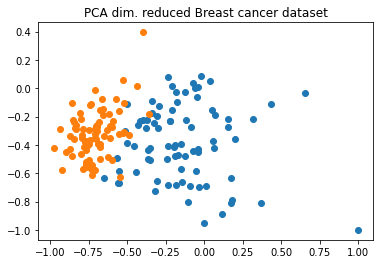

In [2]:
sample_Total, training_input, test_input, class_labels = breast_cancer(
    training_size=80,
    test_size=20,
    n=2,
    plot_data=True
)

In [4]:
backend = Aer.get_backend('statevector_simulator')
quantum_instance = QuantumInstance(backend)
optimizer = COBYLA()

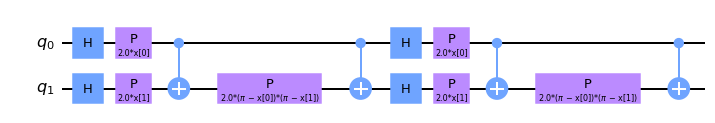

In [5]:
feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')
feature_map.draw(output="mpl")

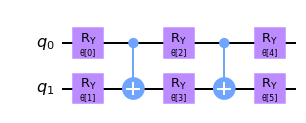

In [6]:
var_form = TwoLocal(num_qubits=2, rotation_blocks = 'ry', entanglement_blocks = 'cx', entanglement = 'linear', reps = 2)
var_form.draw(output="mpl")

And we train again the VQC

In [7]:
vqc = VQC(optimizer = optimizer, feature_map = feature_map, var_form = var_form, 
          training_dataset = training_input, test_dataset = test_input)
result = vqc.run(quantum_instance)
print(result)

{'num_optimizer_evals': 98, 'min_val': 0.43691925747134375, 'opt_params': array([-0.39739464,  0.81298751,  0.92185806, -0.37479448,  0.36018123,
       -1.15288126]), 'eval_time': 266.525187253952, 'eval_count': 98, 'training_loss': 0.43691925747134375, 'testing_accuracy': 0.9, 'test_success_ratio': 0.9, 'testing_loss': 0.41264533490655364}
